# Signal Separation

Extract PWD and PDS signals from original signals.

In [1]:
from mylibs.datautils import read_navy_origin_data, parse_record_signal_file
from mylibs.utils import show_signal, show_signal_freqency
from scipy.fftpack import fft,ifft
import numpy as np
import matplotlib.pyplot as plt
from mylibs.signal_preprocess import cut_head, PWS_signal_extract, PDS_signal_extract, conduct_fft
import copy
from sklearn.cluster import KMeans


NAVY_DATAPATH = '/root/hdd/datasets/navy_glucose'

## Observe original signals

In [2]:
pinfos_frame, pmeta_frame = read_navy_origin_data(NAVY_DATAPATH)

print(pinfos_frame.head())
print(pmeta_frame.head())

   p_id(i) p_name(s)  d_id(i)  gender(i)  age(i)  diabete_type(i)  in_date(d)  \
0        1       JGL        1          1      45                2    20171217   
1        2       FGF        1          0      52                2    20171228   
2        3       ZDM        1          1      36                1    20171224   
3        4       LSQ        1          0      61                2    20171224   
4        5       ZYL        1          1      43                2    20171218   

   out_date(d)  
0     20171229  
1     20180107  
2     20171230  
3     20180107  
4     20180107  
   p_id(i)     date(d)   time(t)     BGC(f)  \
0        1  2017-12-17  19:03:00  23.954281   
1        1  2017-12-17  10:34:00  13.530100   
2        1  2017-12-17  13:00:00  19.749215   
3        1  2017-12-17  09:02:00  22.540321   
4        1  2017-12-17  16:26:00  11.535740   

                                       signal_url(s)  
0  /root/hdd/datasets/navy_glucose/navy_dataset/1...  
1  /root/hdd/datas

In [3]:
example_idx = 34   # 34, 37 is best
bgc_example, r_time_example, signal_example = parse_record_signal_file(
    pmeta_frame.loc[example_idx, 'signal_url(s)'])

print(bgc_example)
print(r_time_example)
print(signal_example)
print(signal_example.shape)

14.423447529231114
21:01:00
[[4.00000000e+01 8.00000000e+01 1.20000000e+02 ... 2.99600000e+04
  3.00000000e+04 3.00400000e+04]
 [2.20086447e+04 2.20131435e+04 2.20007306e+04 ... 1.02397254e+03
  1.19658827e+03 1.27767743e+03]
 [2.20027926e+04 2.19999329e+04 2.20132459e+04 ... 1.32759923e+02
  1.12995415e+02 1.03163377e+02]
 ...
 [2.20009532e+04 2.19930697e+04 2.20024970e+04 ... 9.35892976e+02
  1.25125305e+03 1.21373586e+03]
 [2.02136323e+01 2.11544767e+01 2.08777399e+01 ... 2.39173192e+01
  2.34514338e+01 2.31455936e+01]
 [2.24163963e+01 2.17284054e+01 2.31301357e+01 ... 2.97274892e+01
  3.08534349e+01 3.12344707e+01]]
(7, 751)


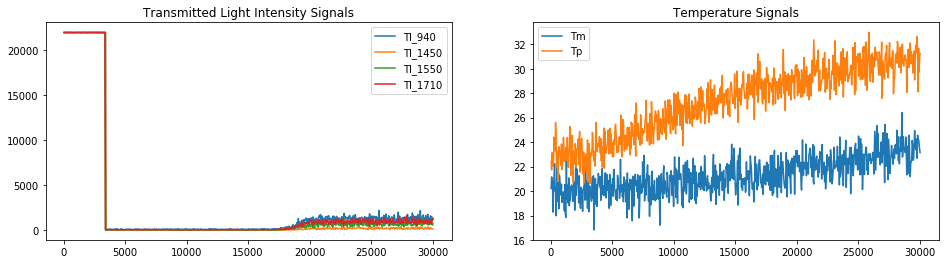

In [4]:
# show example signal
plt.figure(figsize=(16, 4))
show_signal(signal_example)
plt.show()

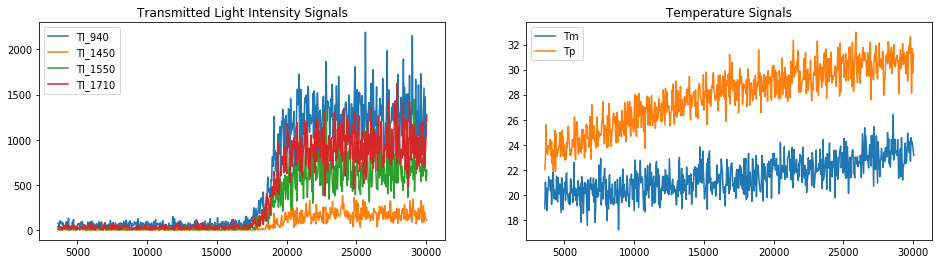

In [5]:
# cut and show example signal
signal_cut_example, _ = cut_head(signal_example)
plt.figure(figsize=(16, 4))
show_signal(signal_cut_example)
plt.show()

In [6]:
# export example signal for paper writing.
np.savetxt("tmp/signal_example_%s.csv" % (example_idx), signal_cut_example.transpose(), delimiter=',')

## Extract PDS

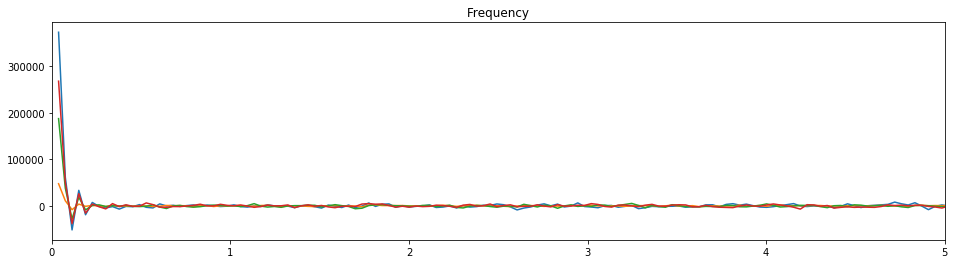

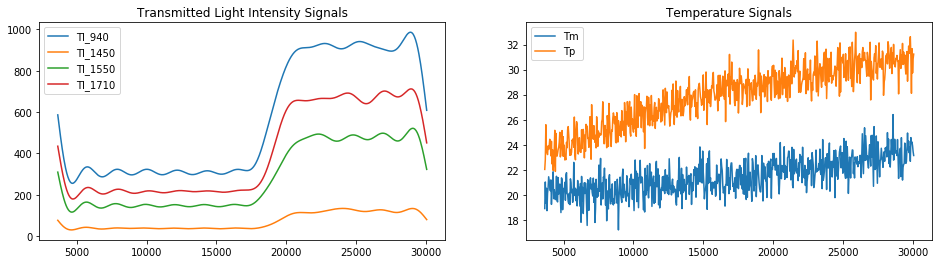

In [7]:
# extract DC signal (PDS) from signal_cut
signal_example_pds, signal_example_freq = PDS_signal_extract(signal_cut_example)

# Show and saving signal in frequency for paper writing.
plt.figure(figsize=(16, 4))
show_signal_freqency(signal_example_freq, xlim=(0, 5))
plt.show()
np.savetxt("tmp/signal_example_freq_%s.csv" % (example_idx), signal_example_freq.transpose(), delimiter=',')

# Show and saving signal for paper writing
plt.figure(figsize=(16, 4))
show_signal(signal_example_pds)
plt.show()
np.savetxt("tmp/signal_example_pds_%s.csv" % (example_idx), signal_example_pds.transpose(), delimiter=',')

## Extract PWS

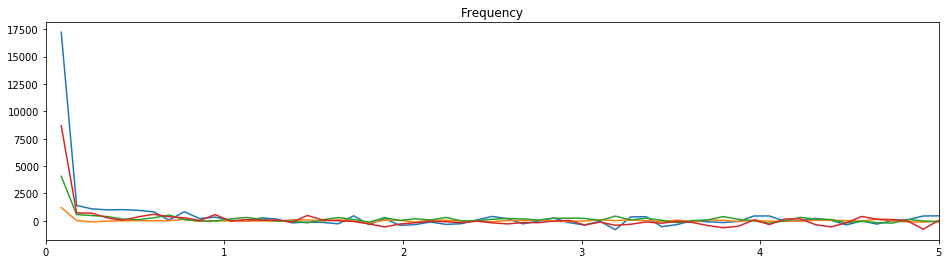

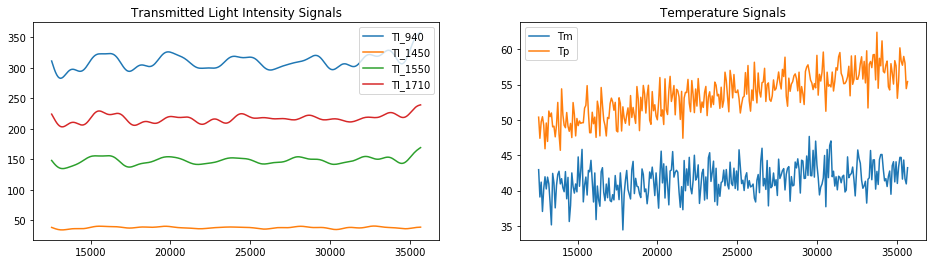

In [9]:
signal_example_pws, signal_eaxmple_lowphase_freq = PWS_signal_extract(signal_cut_example, AC=(1.0, 1.5))

# Show and saving signal in frequency for paper writing.
plt.figure(figsize=(16, 4))
show_signal_freqency(signal_eaxmple_lowphase_freq, xlim=(0, 5))
plt.show()
np.savetxt("tmp/signal_example_lowphase_freq_%s.csv" % (example_idx), signal_eaxmple_lowphase_freq.transpose(), delimiter=',')

# Show and saving signal for paper writing
plt.figure(figsize=(16, 4))
show_signal(signal_example_pws)
plt.show()
np.savetxt("tmp/signal_example_pws_%s.csv" % (example_idx), signal_example_pws.transpose(), delimiter=',')